In [1]:
import os
import sys

import pandas as pd
import json
import gzip
import json  
import zipfile 
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import h5py


PROJ_ROOT = os.path.join(os.pardir)

print(os.path.abspath(PROJ_ROOT))

C:\Users\CVSOX\dse_capstone


In [2]:
#!pip install watermark

In [3]:
%load_ext watermark

## Watermark
Display date and time stamps, package version numbers, and hardware information
for this notebook

In [4]:
%watermark -v -m -p numpy,pandas,matplotlib.pyplot

CPython 3.6.5
IPython 6.4.0

numpy 1.13.3
pandas 0.23.0
matplotlib.pyplot 2.2.2

compiler   : MSC v.1900 64 bit (AMD64)
system     : Windows
release    : 10
machine    : AMD64
processor  : Intel64 Family 6 Model 60 Stepping 3, GenuineIntel
CPU cores  : 8
interpreter: 64bit


In [5]:
women_cloth_jewel = os.path.join(PROJ_ROOT,
                                "data",
                                "raw",
                                'reviews_Clothing_Shoes_and_Jewelry_5.json.gz')
#women_cloth_jewel='reviews_Clothing_Shoes_and_Jewelry_5.json.gz'

# Read from gzip file
def read_gzip(filename):
    for line in gzip.open(filename):
        yield eval(line)

# cellphone_data = pd.read_csv(filename,compression='gzip',error_bad_lines=False)
# clothing_data=pd.read_csv(women_clothes,compression='gzip',error_bad_lines=False)
# productmeta_df = pd.read_csv(product_meta,compression='gzip',error_bad_lines=False)

dataset = []
for line in read_gzip(women_cloth_jewel):
    dataset.append(line)


In [6]:
cleanedhd5 = os.path.join(PROJ_ROOT,
                                "data",
                                "raw",
                                'cleaned.hd5')
file = h5py.File(cleanedhd5, 'r')
#file = h5py.File('cleaned.hd5', 'r')
def keys(f):
   return [key for key in f.keys()]

keys(file)


['womens']

In [7]:
dataset[0]

{'reviewerID': 'A1KLRMWW2FWPL4',
 'asin': '0000031887',
 'reviewerName': 'Amazon Customer "cameramom"',
 'helpful': [0, 0],
 'reviewText': "This is a great tutu and at a really great price. It doesn't look cheap at all. I'm so glad I looked on Amazon and found such an affordable tutu that isn't made poorly. A++",
 'overall': 5.0,
 'summary': 'Great tutu-  not cheaply made',
 'unixReviewTime': 1297468800,
 'reviewTime': '02 12, 2011'}

In [8]:
df=pd.DataFrame(dataset)

In [9]:
df.head()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0000031887,"[0, 0]",5.0,This is a great tutu and at a really great pri...,"02 12, 2011",A1KLRMWW2FWPL4,"Amazon Customer ""cameramom""",Great tutu- not cheaply made,1297468800
1,0000031887,"[0, 0]",5.0,I bought this for my 4 yr old daughter for dan...,"01 19, 2013",A2G5TCU2WDFZ65,Amazon Customer,Very Cute!!,1358553600
2,0000031887,"[0, 0]",5.0,What can I say... my daughters have it in oran...,"01 4, 2013",A1RLQXYNCMWRWN,Carola,I have buy more than one,1357257600
3,0000031887,"[0, 0]",5.0,"We bought several tutus at once, and they are ...","04 27, 2014",A8U3FAMSJVHS5,Caromcg,"Adorable, Sturdy",1398556800
4,0000031887,"[0, 0]",5.0,Thank you Halo Heaven great product for Little...,"03 15, 2014",A3GEOILWLK86XM,CJ,Grammy's Angels Love it,1394841600


In [10]:
df.asin.unique().size

23033

Text(0.5,0,'Ratings')

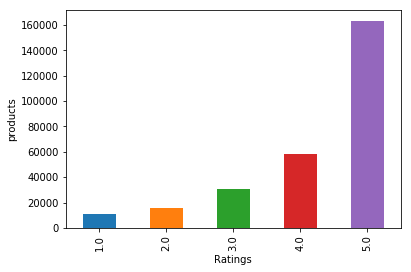

In [11]:
a=df.groupby('overall')['asin'].count()
a.plot.bar()
plt.ylabel('products')
plt.xlabel('Ratings')

In [12]:
a

overall
1.0     11192
2.0     15463
3.0     30425
4.0     58357
5.0    163240
Name: asin, dtype: int64

In [13]:
from scipy.stats import boxcox
boxcox_transformed_data = boxcox(df['overall'])

In [14]:
df['overall'].head()

0    5.0
1    5.0
2    5.0
3    5.0
4    5.0
Name: overall, dtype: float64

In [15]:
from scipy import stats

# For scaling and centering you can use preprocessing from sklearn:

from sklearn import preprocessing
centered_scaled_data = preprocessing.scale(a)
# For Box-Cox you can use boxcox from scipy:



# For calculation of skewness you can use skew from scipy:

from scipy.stats import skew
skness = skew(a)

C:\Users\CVSOX\Anaconda3\envs\dse_capstone\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [16]:
skness

1.206372412063028

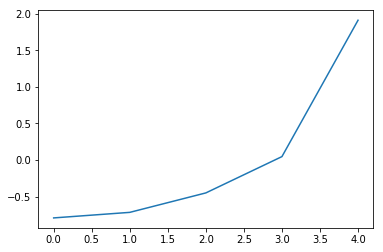

In [17]:
plt.plot(centered_scaled_data)

In [18]:
df['lengthOfReview']=df['reviewText'].str.split().str.len()

In [19]:
df.head()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,lengthOfReview
0,0000031887,"[0, 0]",5.0,This is a great tutu and at a really great pri...,"02 12, 2011",A1KLRMWW2FWPL4,"Amazon Customer ""cameramom""",Great tutu- not cheaply made,1297468800,35
1,0000031887,"[0, 0]",5.0,I bought this for my 4 yr old daughter for dan...,"01 19, 2013",A2G5TCU2WDFZ65,Amazon Customer,Very Cute!!,1358553600,61
2,0000031887,"[0, 0]",5.0,What can I say... my daughters have it in oran...,"01 4, 2013",A1RLQXYNCMWRWN,Carola,I have buy more than one,1357257600,62
3,0000031887,"[0, 0]",5.0,"We bought several tutus at once, and they are ...","04 27, 2014",A8U3FAMSJVHS5,Caromcg,"Adorable, Sturdy",1398556800,76
4,0000031887,"[0, 0]",5.0,Thank you Halo Heaven great product for Little...,"03 15, 2014",A3GEOILWLK86XM,CJ,Grammy's Angels Love it,1394841600,80


In [20]:
df['lengthOfReview'].mean()

59.95304599949045

In [21]:
b=df.groupby('asin')['lengthOfReview'].mean()

Text(0,0.5,'Review Words Count')

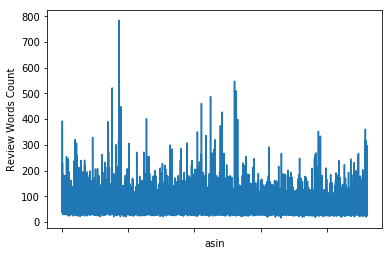

In [22]:
b.plot()
plt.ylabel('Review Words Count')

In [23]:
df['date'] = pd.to_datetime(df['unixReviewTime'], unit='s')

In [24]:
df.head()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,lengthOfReview,date
0,0000031887,"[0, 0]",5.0,This is a great tutu and at a really great pri...,"02 12, 2011",A1KLRMWW2FWPL4,"Amazon Customer ""cameramom""",Great tutu- not cheaply made,1297468800,35,2011-02-12
1,0000031887,"[0, 0]",5.0,I bought this for my 4 yr old daughter for dan...,"01 19, 2013",A2G5TCU2WDFZ65,Amazon Customer,Very Cute!!,1358553600,61,2013-01-19
2,0000031887,"[0, 0]",5.0,What can I say... my daughters have it in oran...,"01 4, 2013",A1RLQXYNCMWRWN,Carola,I have buy more than one,1357257600,62,2013-01-04
3,0000031887,"[0, 0]",5.0,"We bought several tutus at once, and they are ...","04 27, 2014",A8U3FAMSJVHS5,Caromcg,"Adorable, Sturdy",1398556800,76,2014-04-27
4,0000031887,"[0, 0]",5.0,Thank you Halo Heaven great product for Little...,"03 15, 2014",A3GEOILWLK86XM,CJ,Grammy's Angels Love it,1394841600,80,2014-03-15


In [25]:
c=df['asin'].groupby(df['date'])

Text(0,0.5,'# number of customers')

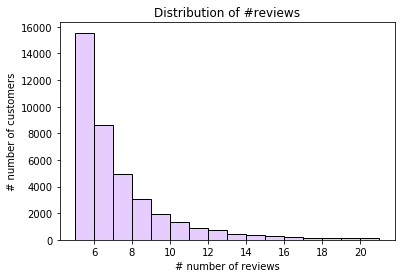

In [26]:
ax = df.groupby(['reviewerID']).asin.nunique().reset_index()['asin'].plot(kind = 'hist',bins =range(5,22,1),\
                                                                                 title = 'Distribution of #reviews' \
                                                                                ,facecolor='#e6ccff',edgecolor='black')
ax.set_xlabel('# number of reviews')
ax.set_ylabel('# number of customers')



In [27]:
helpful=[]
outof=[]
for i in range(len(df['helpful'])):
    x = df['helpful'][i][0]
    helpful.append(x)
    y = df['helpful'][i][1]
    outof.append(y)

In [28]:
df['helpful']=helpful
df['outof']=outof

In [29]:
df.head()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,lengthOfReview,date,outof
0,0000031887,0,5.0,This is a great tutu and at a really great pri...,"02 12, 2011",A1KLRMWW2FWPL4,"Amazon Customer ""cameramom""",Great tutu- not cheaply made,1297468800,35,2011-02-12,0
1,0000031887,0,5.0,I bought this for my 4 yr old daughter for dan...,"01 19, 2013",A2G5TCU2WDFZ65,Amazon Customer,Very Cute!!,1358553600,61,2013-01-19,0
2,0000031887,0,5.0,What can I say... my daughters have it in oran...,"01 4, 2013",A1RLQXYNCMWRWN,Carola,I have buy more than one,1357257600,62,2013-01-04,0
3,0000031887,0,5.0,"We bought several tutus at once, and they are ...","04 27, 2014",A8U3FAMSJVHS5,Caromcg,"Adorable, Sturdy",1398556800,76,2014-04-27,0
4,0000031887,0,5.0,Thank you Halo Heaven great product for Little...,"03 15, 2014",A3GEOILWLK86XM,CJ,Grammy's Angels Love it,1394841600,80,2014-03-15,0


In [30]:
help_review = df[['overall','helpful','outof']].groupby('overall').sum().reset_index()

In [31]:
help_review['yes_pct'] = help_review['helpful']*100/help_review['outof']
help_review['no_pct'] = (help_review['outof']-help_review['helpful'])*100/help_review['outof']

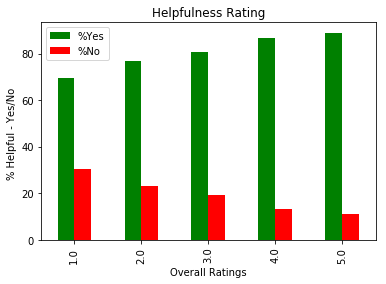

In [32]:
ax = help_review[['overall','yes_pct','no_pct']].plot(kind = 'bar', x = 'overall', title = 'Helpfulness Rating'\
                                                        ,color =['g','r'])
                                                        


ax.set_xlabel('Overall Ratings')
ax.set_ylabel('% Helpful - Yes/No ')
#ax.set_axis_bgcolor('#fffbf0')
ax.legend(('%Yes','%No'),loc=0)

In [34]:
# df_meta = pd.read_hdf(os.path.join(PROJ_ROOT, 
#                                 "data", 
#                                 "raw", 
#                                 'cleaned.hd5'), key='womens')

#df_meta = pd.read_hdf(cleanedhd5, key = 'womens')

In [35]:
#df_meta.head()

In [36]:
#df_meta['PRODUCT_DESCRIPTION'][0]

In [37]:
#df_meta['asin'][0]